In [19]:
import scanpy as sc

In [20]:
import pandas as pd

In [21]:
import numpy as np

In [22]:
from tqdm import tqdm
# use a progress bar 

In [23]:
sample_folders = ["RB01_rep1", "RB01_rep2", "RB02_rep1", "RB02_rep2", "RB03_rep1", "RB03_rep2", "RB04", "RB05", "RB06", "RB07",]
# Create an empty list first
adata_list = []

In [24]:
# use a for-loop to read in all the files
for sample in tqdm(sample_folders): 
    pathname = "D:/Research raw data/"+sample
    print("Reading files at:" + pathname)
    adata=sc.read_10x_mtx("D:/Research raw data/"+sample)
    patient_id = sample[:4] # extract the patient info
    sample_id = sample # extract the sample info
    # we add the patient and sample information into our adata object, specifically, the .obs slot
    # .obs stands for observation i.e every single-cell is an observation
    adata.obs["patient_id"] = patient_id
    adata.obs["sample_id"] = sample_id
    # the function will complain that we need to run this
    adata.var_names_make_unique() # a var, stands for variable i.e. genes. so this function is to make the gene names unique
    # why? because multiple ensembl gene ids can map to the same gene e.g. spliced isoforms. sometimes we care about spliced isoforms and we want to keep them separate
    # so something like IL6, would be become IL6 and IL6-1
    adata_list.append(adata) # append to my adata_list above, iteratively

# finally, concatenate all the objects into a singlular one
adata = sc.concat(adata_list)
# print what the final object looks like
adata


  0%|          | 0/10 [00:00<?, ?it/s]

Reading files at:D:/Research raw data/RB01_rep1


  0%|          | 0/10 [00:26<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
# check if location is directory.
import os

print(os.path.isdir("D:/Research raw data/RB01_rep1"))

# check if something is a file
print(os.path.isfile("D:/Research raw data/RB01_rep1/barcodes.tsv.gz"))


True
True


In [ ]:
folder = "RB05"
folder[:5]

'RB05'

In [ ]:
# save the adata, so you don't have to keep reading in like this
adata.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")

In [25]:
# Everytime i open the file 
#in the future, you can open a new notebook and just do
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

KeyboardInterrupt: 

In [ ]:
adata_rb.obs_names_make_unique()
adata_rb.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")



In [ ]:
# say if you have a control object read in the same as above:
# you can contenate like:
# adata_combined = sc.concat([adata_rb, adata_ctrl])
# print what the final object looks like 
# adata_combined

In [1]:
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [2]:
import numpy as np
import pandas as pd

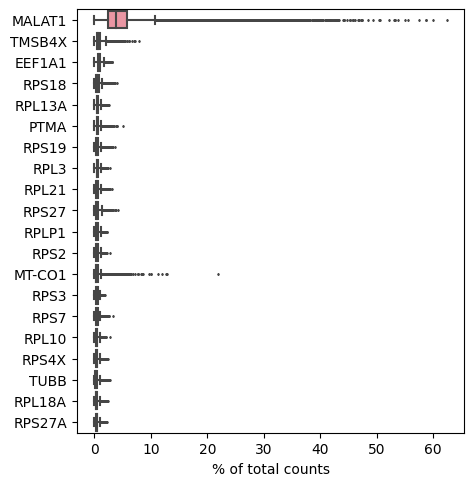

In [3]:
sc.pl.highest_expr_genes(adata_rb, n_top=20, )


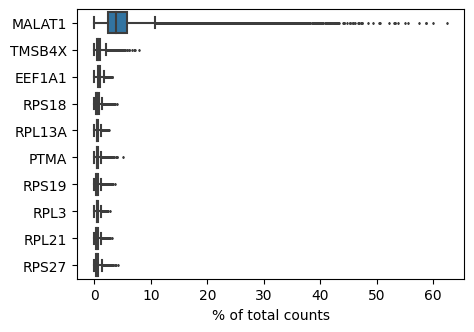

In [4]:
sc.pl.highest_expr_genes(adata_rb, n_top=10, )


In [5]:
sc.pp.filter_cells(adata_rb, min_genes=200)
sc.pp.filter_genes(adata_rb, min_cells=3)
adata_rb

AnnData object with n_obs × n_vars = 91555 × 24842
    obs: 'patient_id', 'sample_id', 'n_genes'
    var: 'n_cells'

In [6]:
adata_rb.var['mt'] = adata_rb.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rb, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


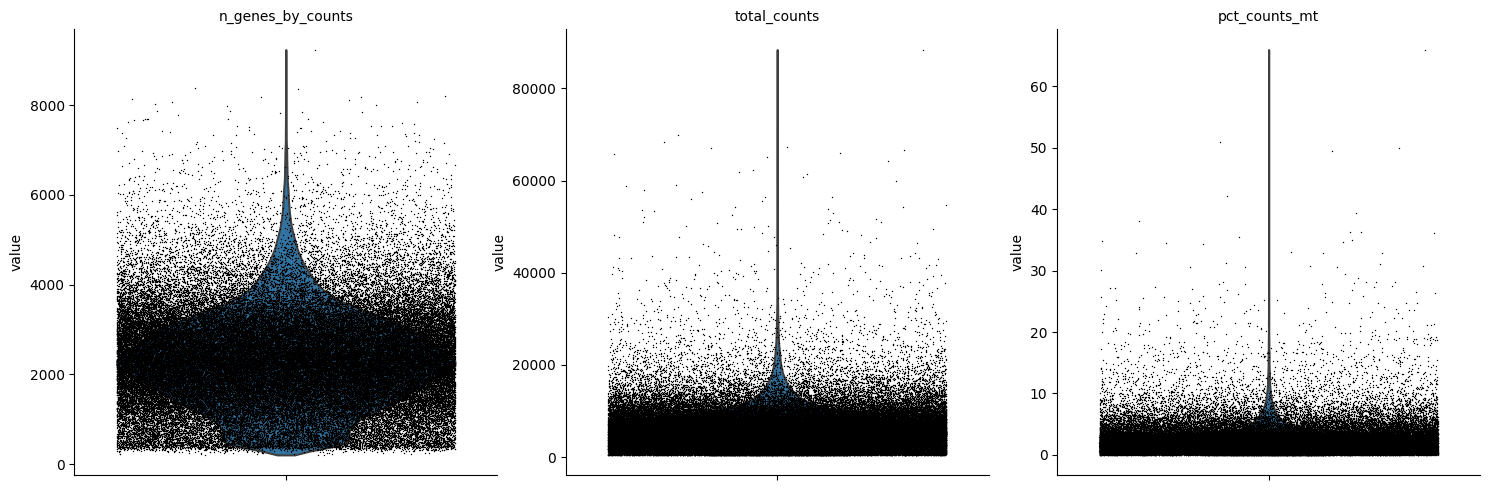

In [7]:
sc.pl.violin(adata_rb, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

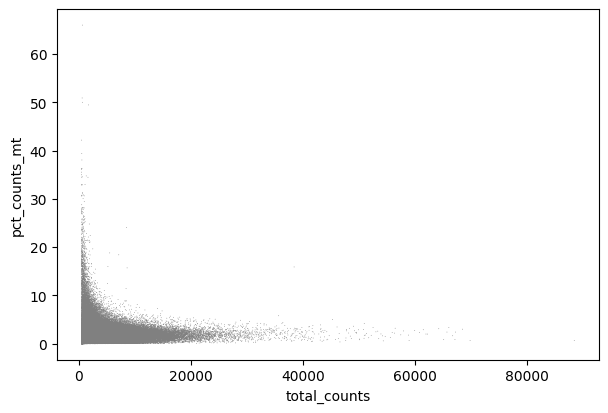

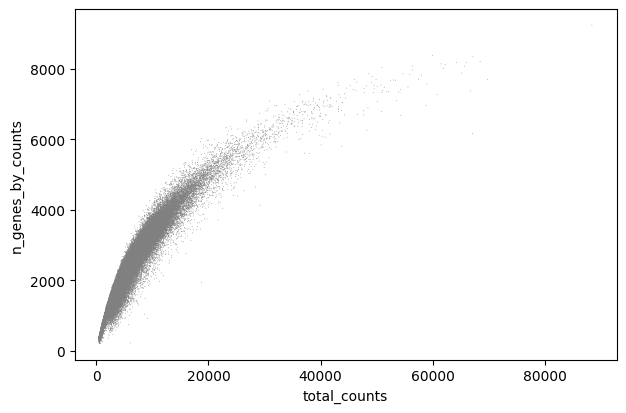

In [8]:
sc.pl.scatter(adata_rb, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_rb, x='total_counts', y='n_genes_by_counts')

In [9]:
# KT: i think based on your scatter above, we can up these numbers to 6000 and 10 respectively
adata_rb = adata_rb[adata_rb.obs.n_genes_by_counts < 6000, :]
adata_rb = adata_rb[adata_rb.obs.pct_counts_mt < 10, :]


In [10]:
sc.pp.normalize_total(adata_rb, target_sum=1e4)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [11]:
sc.pp.log1p(adata_rb)


In [12]:
sc.pp.highly_variable_genes(adata_rb, min_mean=0.0125, max_mean=3, min_disp=0.5)


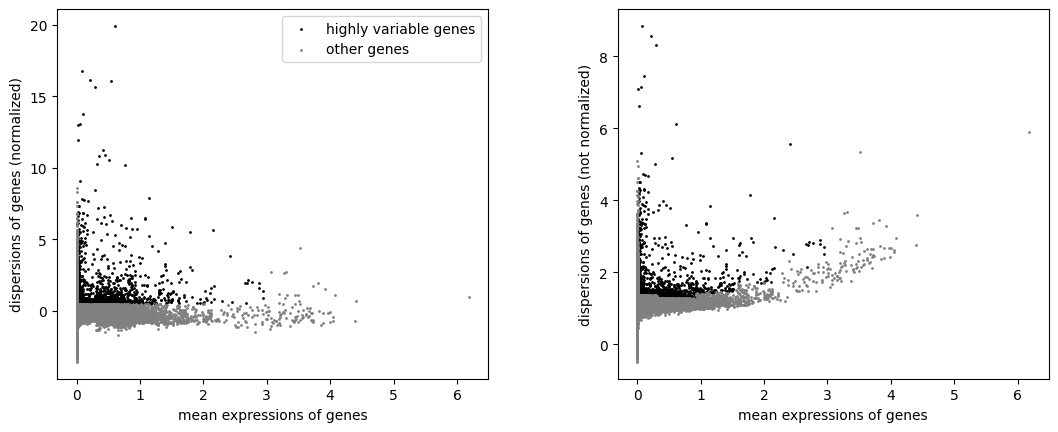

In [13]:
sc.pl.highly_variable_genes(adata_rb)


In [14]:
adata_rb.raw = adata_rb


In [15]:
adata_rb = adata_rb[:, adata_rb.var.highly_variable]


In [16]:
sc.pp.regress_out(adata_rb, ['total_counts', 'pct_counts_mt'])


In [17]:
sc.pp.scale(adata_rb, max_value=10)


In [18]:
sc.tl.pca(adata_rb, svd_solver='arpack')


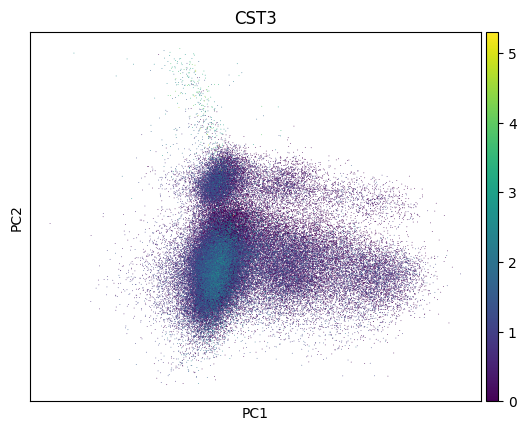

In [19]:
sc.pl.pca(adata_rb, color='CST3')


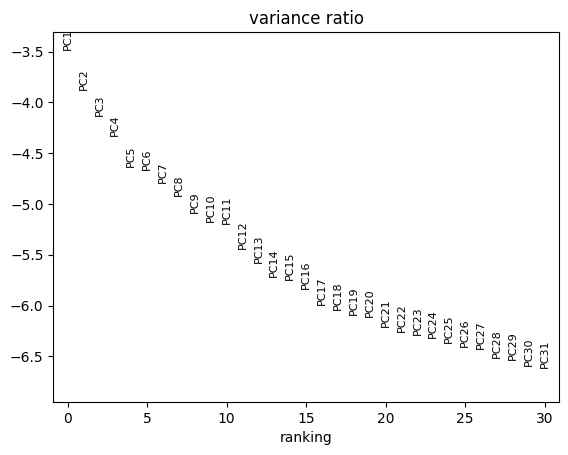

In [20]:
sc.pl.pca_variance_ratio(adata_rb, log=True)


In [21]:
import os 

In [22]:
!mkdir write

A subdirectory or file write already exists.


In [23]:
results_file = 'write/rb.h5ad'  # the file that will store the analysis results


In [24]:
adata_rb.write(results_file)


In [25]:
adata_rb

AnnData object with n_obs × n_vars = 89927 × 1393
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [26]:
sc.pp.neighbors(adata_rb, n_neighbors=10, n_pcs=40)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1086: 

In [27]:
pip install leidenalg

In [28]:
import leidenalg as leiden

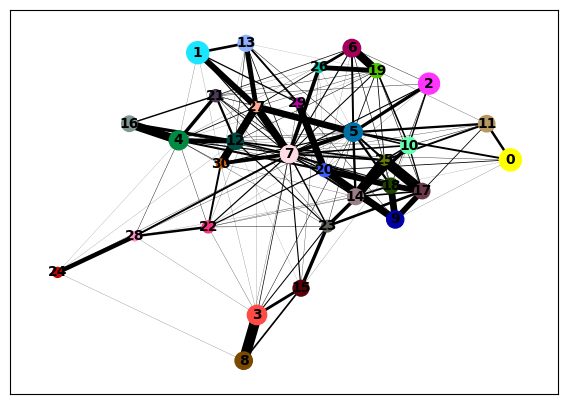

In [29]:
sc.tl.leiden(adata_rb)
sc.tl.paga(adata_rb)
sc.pl.paga(adata_rb)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_rb, init_pos='paga')

In [30]:
sc.tl.umap(adata_rb)


In [31]:
import scanpy as sc
import pandas as pd
import numpy as np 

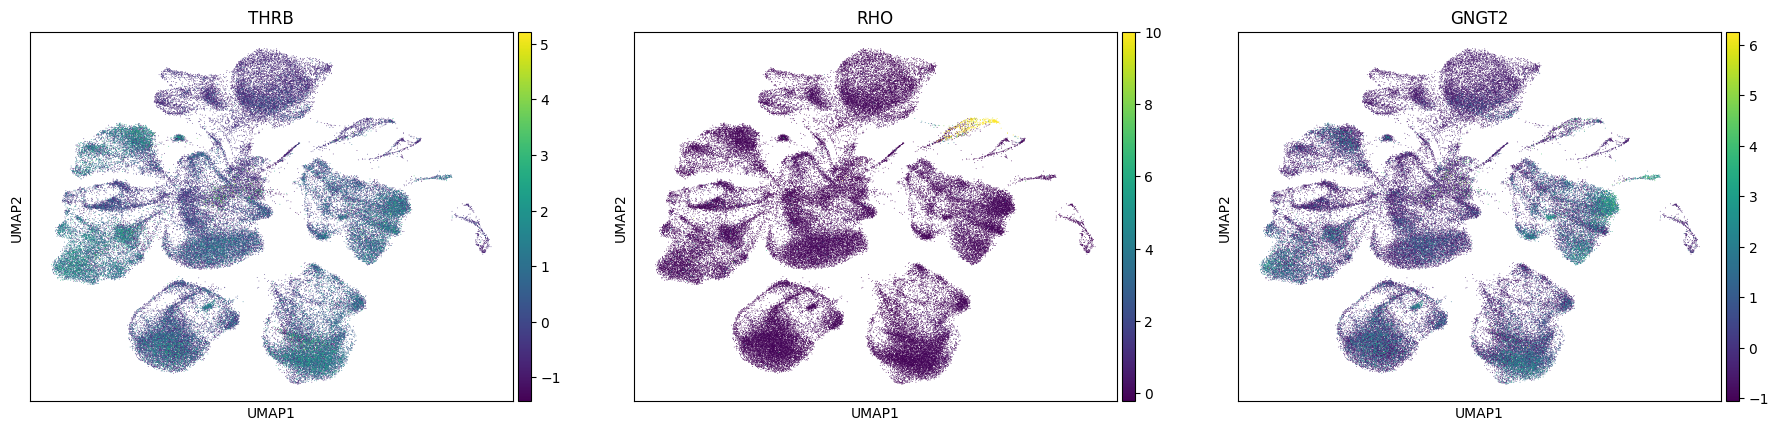

In [50]:
sc.pl.umap(adata_rb, color=['THRB', 'RHO', 'GNGT2'], use_raw=False)
# Not sure whether these are the optimal genes, is there a way to use groups of multiple genes? 
# am I supposed to just put normal retinal gene markers in this part?
# THRB = early cone marker ; RHO = mature rod marker; GNGT2 = mature cone marker 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


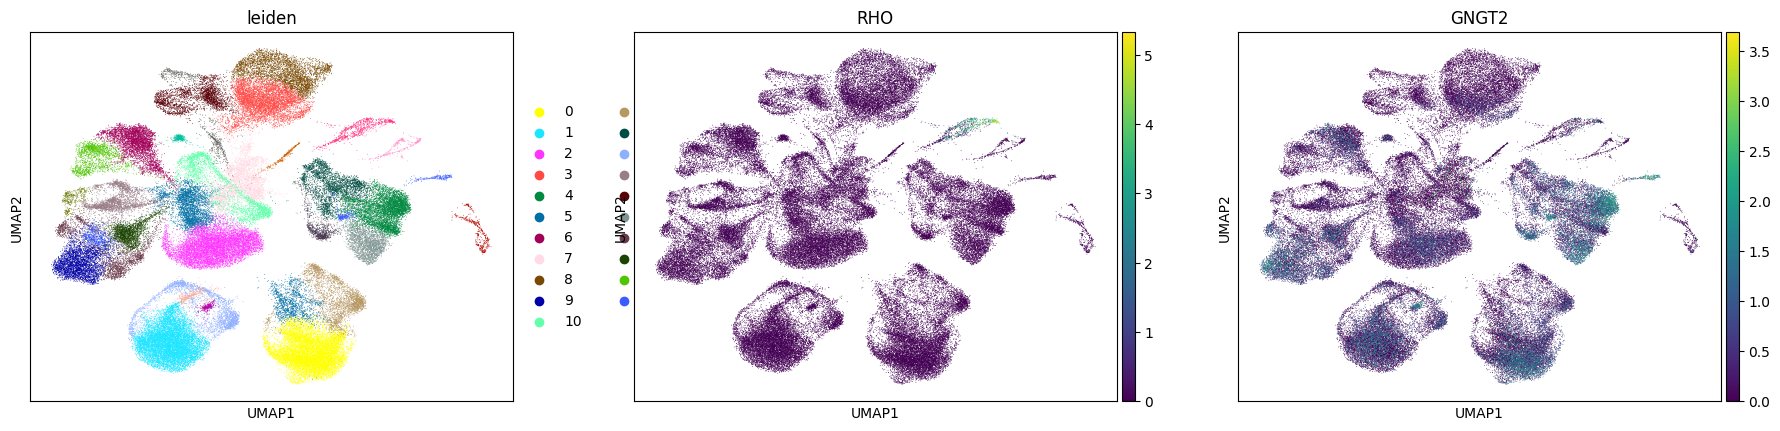

In [51]:
sc.pl.umap(adata_rb, color=['leiden', 'RHO', 'GNGT2'])
#same thing not sure whether these are the optimal genes to do so 

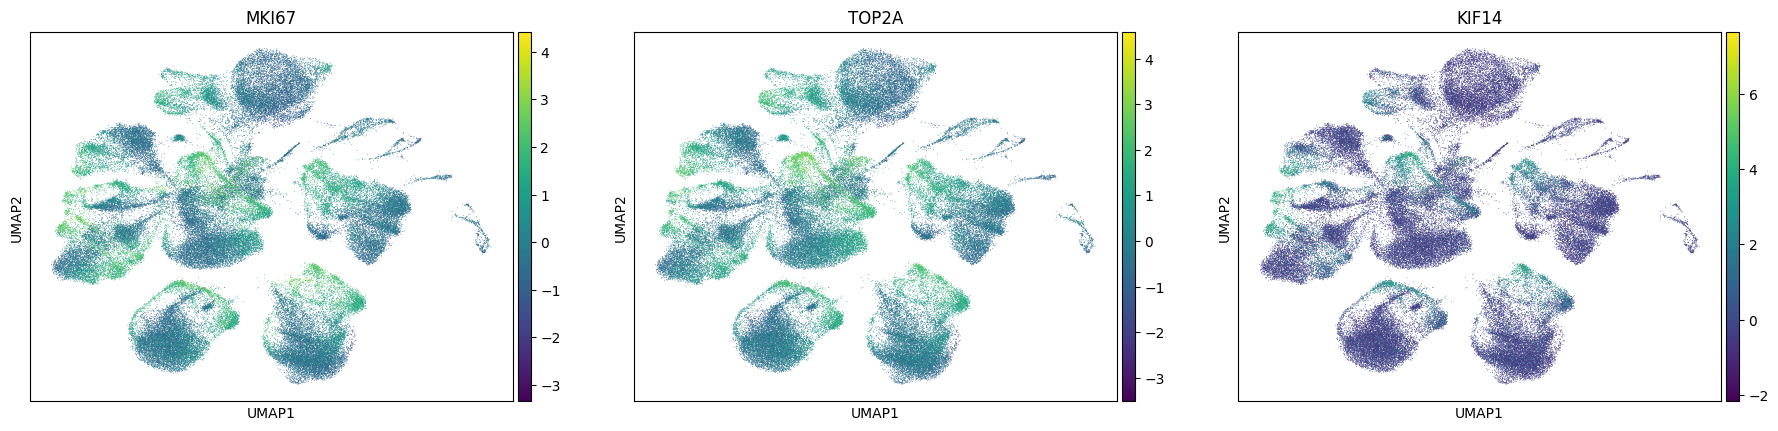

In [67]:
sc.pl.umap(adata_rb, color=['MKI67', 'TOP2A', 'KIF14'], use_raw=False)
#proliferation-related markers - tumour cells??

In [52]:
adata_rb.write(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

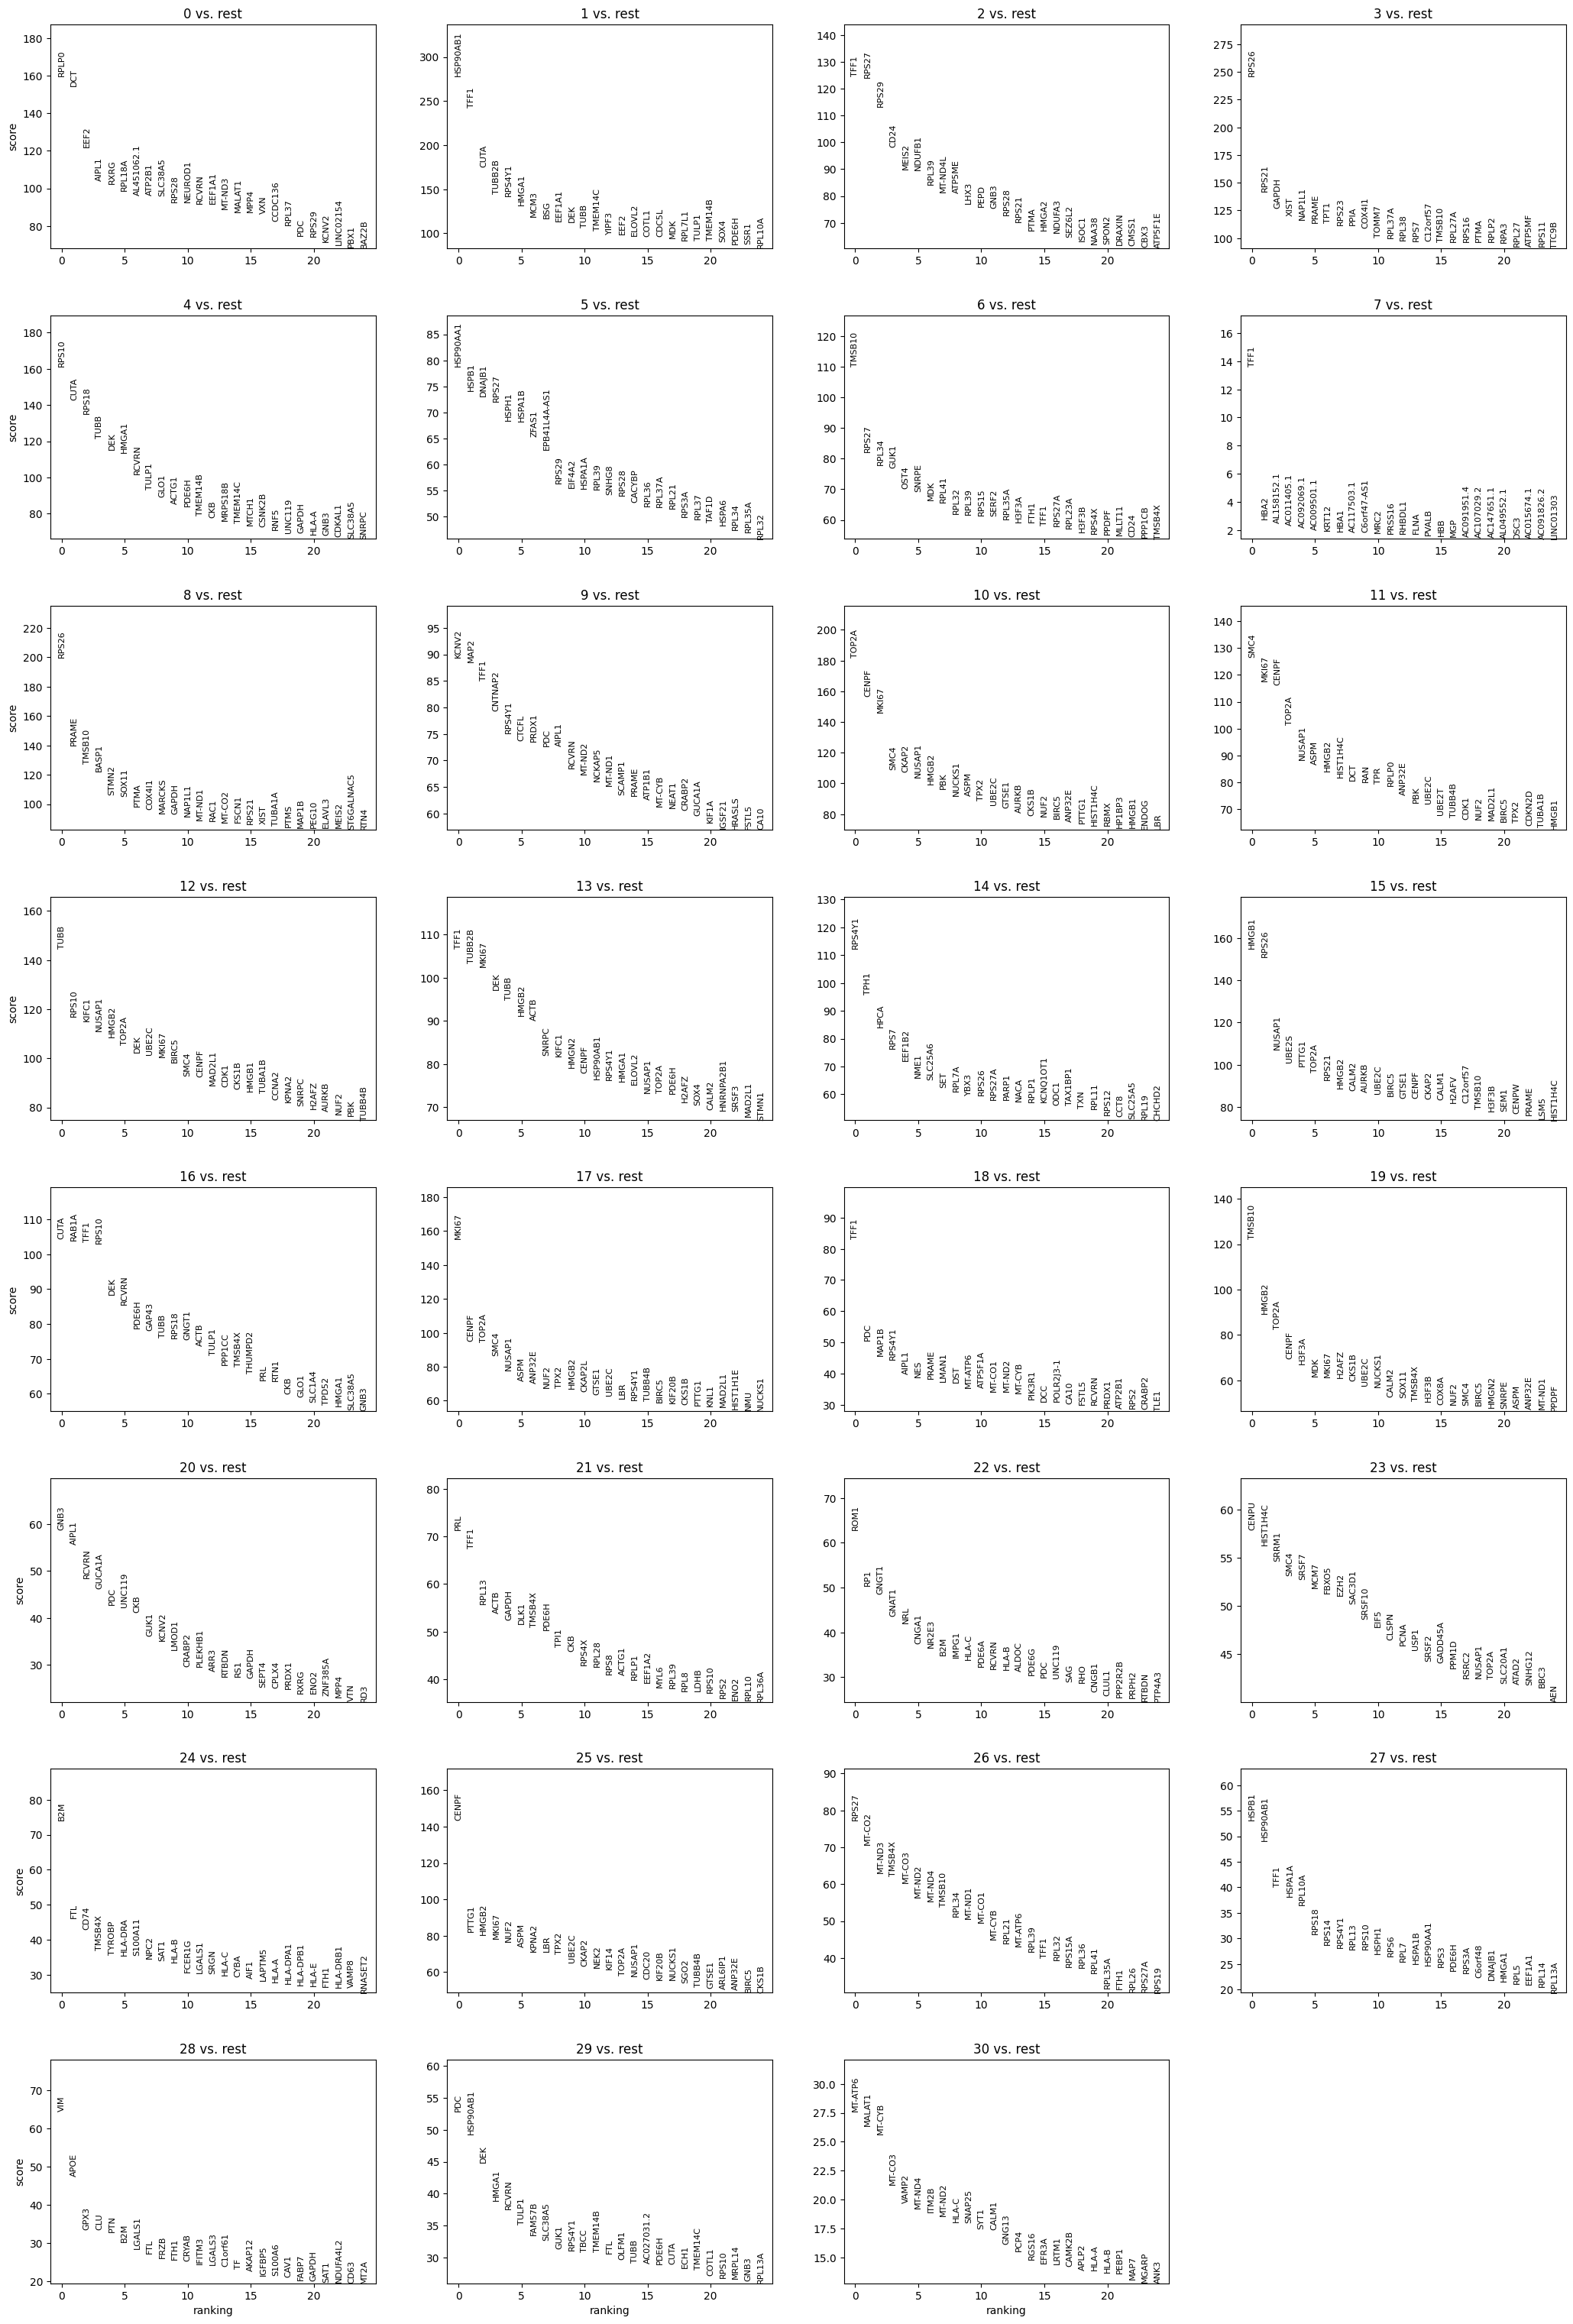

In [56]:
sc.tl.rank_genes_groups(adata_rb , 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_rb , n_genes=25, sharey=False)

ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

    finished (0:13:39)


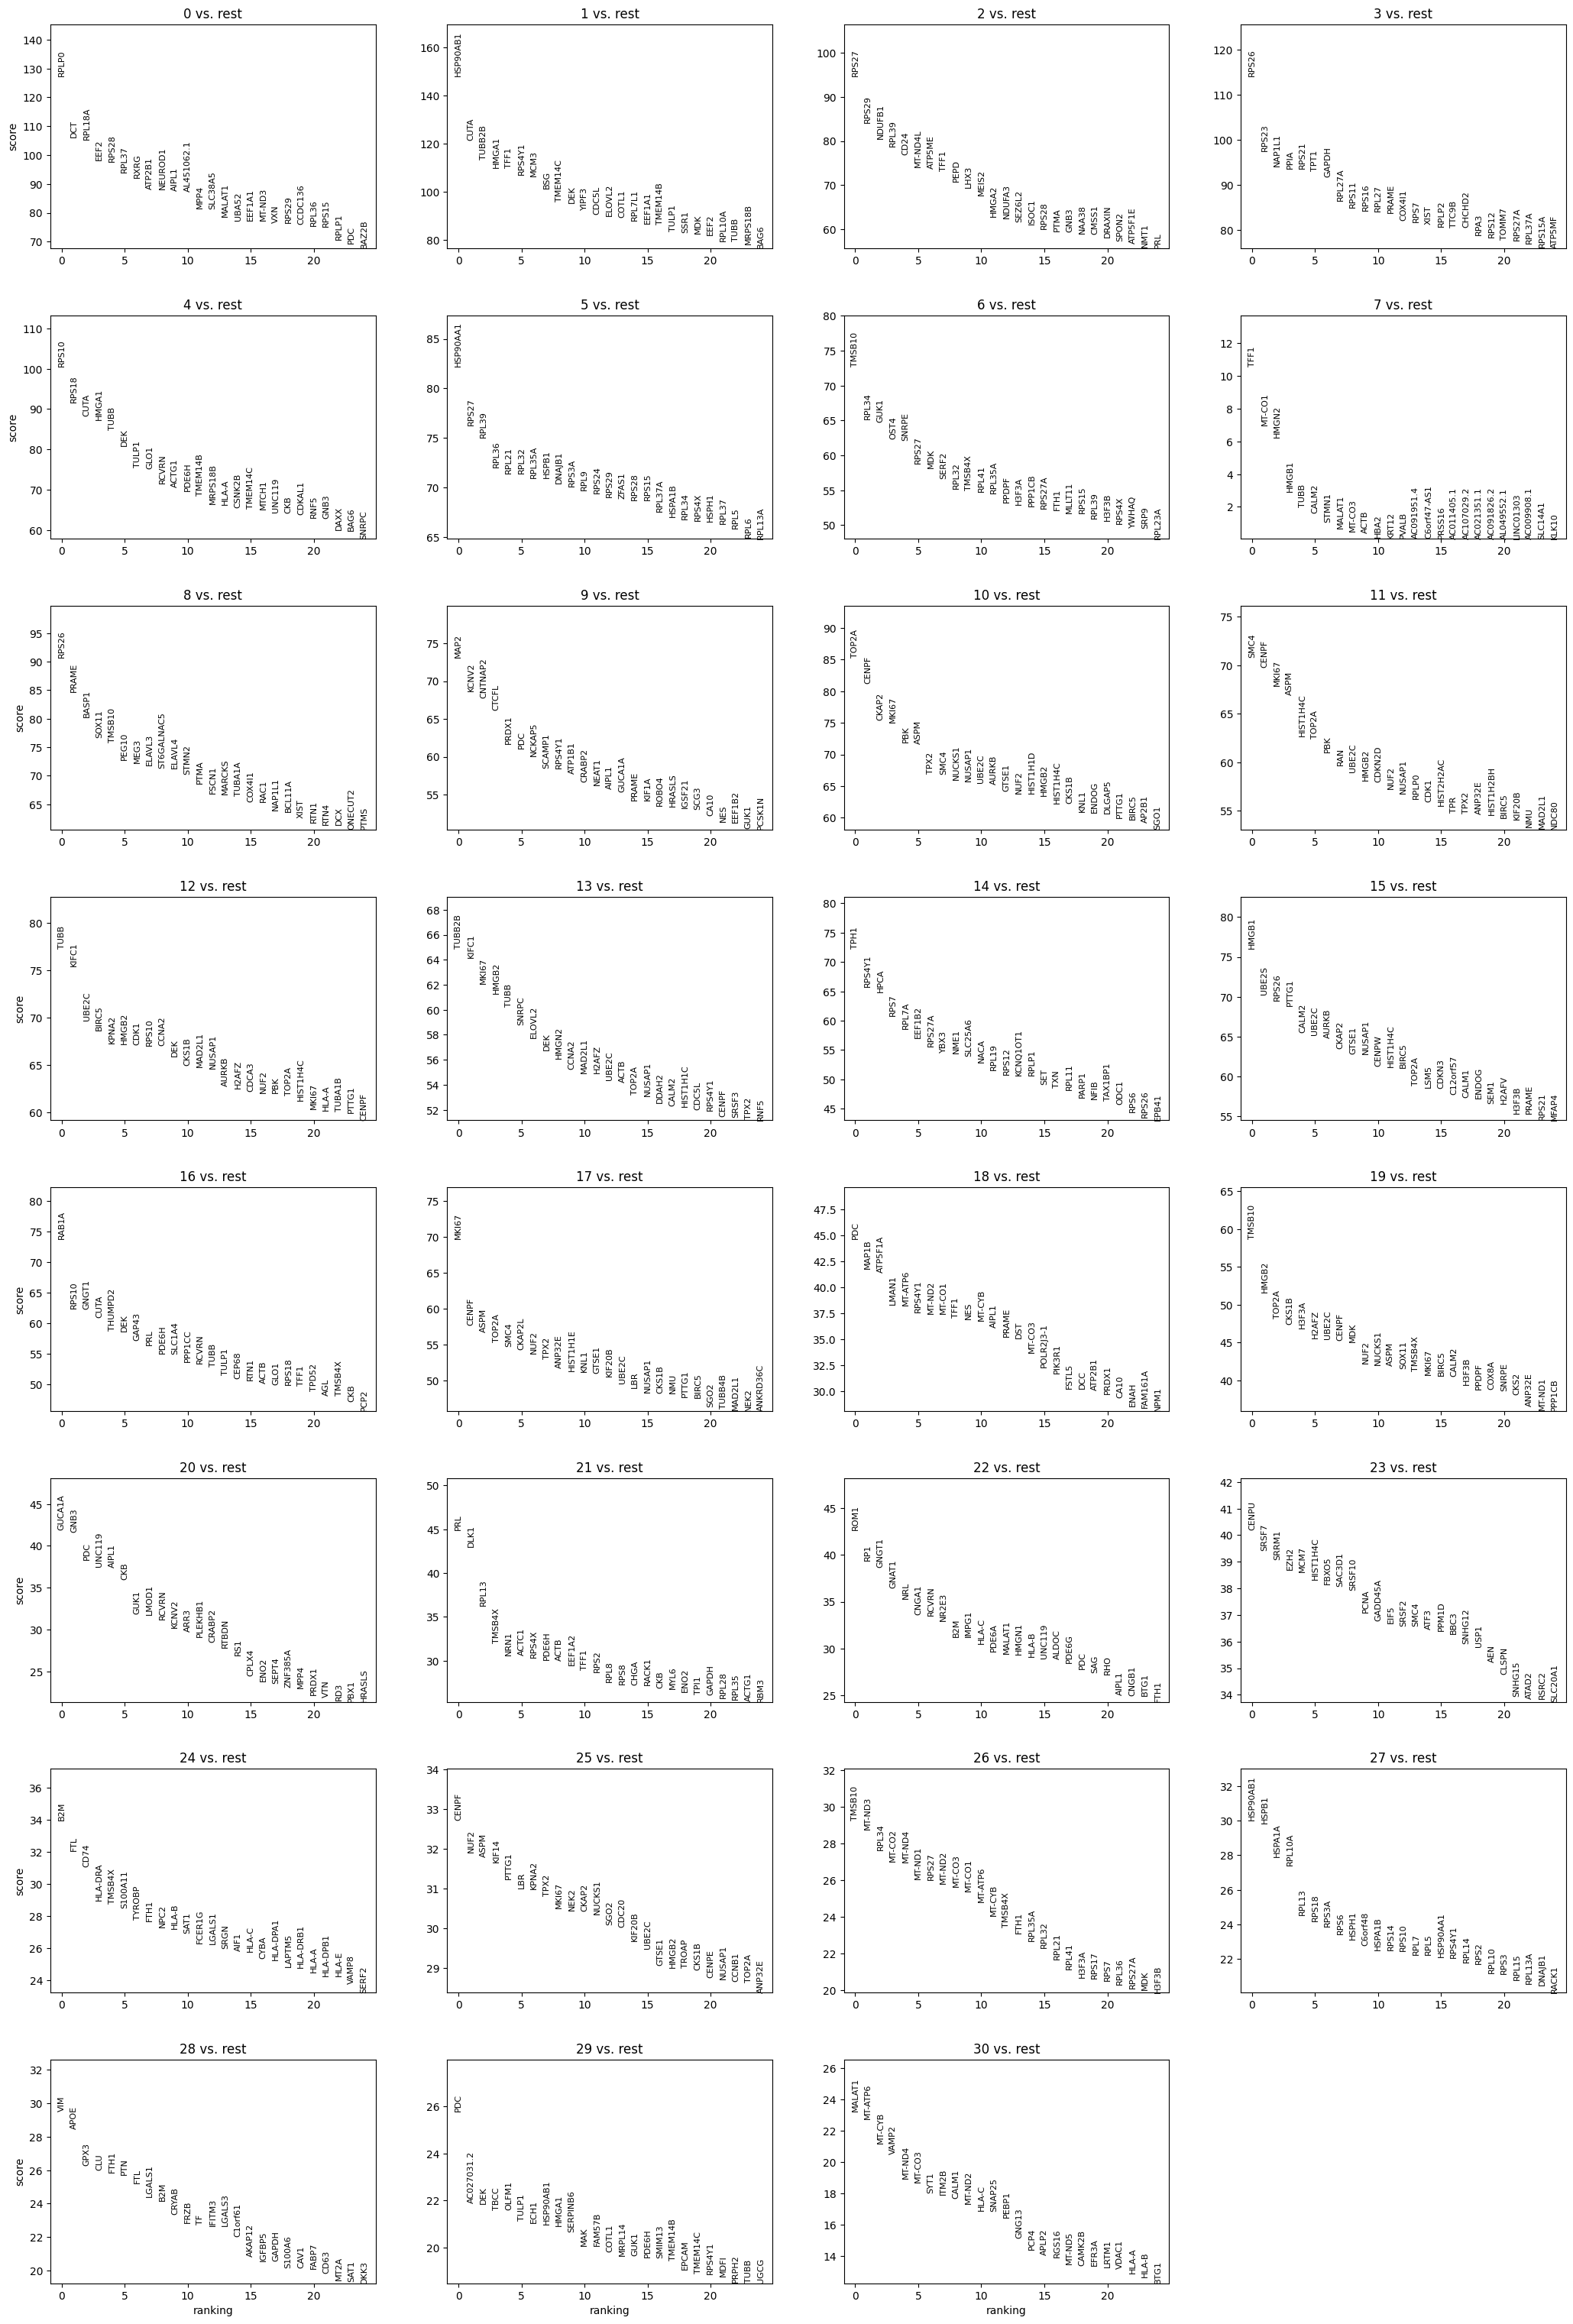

In [61]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

In [68]:
adata_rb.write(results_file)


In [69]:
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

ranking genes


In [ ]:
#scanpy tute defines a list of marker_genes 
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
# not sure how to define that - currently researching marker genes related to retina, 
# do i only define markers related to healthy retina?
# this data set also has way more groups than the scanpy tute 

In [65]:
adata_result = sc.read(results_file)

In [66]:
print (adata_result)

AnnData object with n_obs × n_vars = 47323 × 1324
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [67]:
pd.DataFrame(adata_result.uns['rank_genes_groups']['names']).head(5)


0         1      2      3       4      5       6       7       8  \
0   RPLP0  HSP90AB1  RPS27  RPS26  TMSB10  RPS10  RPS4Y1   HMGB1   RPS27   
1  RPL18A      CUTA   PEPD  PRAME    GUK1  RPS18     PDC  TUBA1B   RPL39   
2   RPS28      TFF1  MEIS2   TPT1  TMSB4X   TUBB   PRAME    PTMA   RPS29   
3   RPL37    TUBB2B   LHX3  RPS23    OST4  HMGA1   CTCFL   HMGN2  RPS15A   
4     DCT       BSG   CD24  GAPDH   H3F3A   CUTA   AIPL1   STMN1   RPL41   

          9  ...      19       20     21        22     23       24      25  \
0  HSP90AA1  ...   MKI67  ARL6IP1  UBE2S  HIST1H4C  MKI67      B2M     PRL   
1    HSPA1B  ...   TOP2A     ACTB  RPS26      RRM2   TUBB      FTL    DLK1   
2    HSPA1A  ...   CENPF  HSP90B1  PTTG1      EZH2  KIFC1     CD74  TMSB4X   
3    DNAJB1  ...    SMC4    PTTG1   PTMS     FBXO5  TOP2A   TMSB4X    TFF1   
4     HSPB1  ...  NUSAP1    CCNB2  HMGB1   GADD45A  CENPF  S100A11   RPL13   

       26    27       28  
0  TMSB10   VIM   MALAT1  
1  MT-ND3  APOE    VAMP2  
2  MT-CO2  GPX3  MT-ATP6  
3  MT-ND4   FTL   SNAP25  
4   RPL34  FTH1   MT-CYB  

[5 rows x 29 columns]

In [68]:
result = adata_result.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

0_n  0_p       1_n  1_p    2_n  2_p    3_n  3_p     4_n  4_p  ...  \
0   RPLP0  0.0  HSP90AB1  0.0  RPS27  0.0  RPS26  0.0  TMSB10  0.0  ...   
1  RPL18A  0.0      CUTA  0.0   PEPD  0.0  PRAME  0.0    GUK1  0.0  ...   
2   RPS28  0.0      TFF1  0.0  MEIS2  0.0   TPT1  0.0  TMSB4X  0.0  ...   
3   RPL37  0.0    TUBB2B  0.0   LHX3  0.0  RPS23  0.0    OST4  0.0  ...   
4     DCT  0.0       BSG  0.0   CD24  0.0  GAPDH  0.0   H3F3A  0.0  ...   

      24_n           24_p    25_n           25_p    26_n          26_p  27_n  \
0      B2M  4.939844e-193     PRL  9.061571e-111  TMSB10  1.439299e-95   VIM   
1      FTL  5.774580e-162    DLK1   8.846523e-84  MT-ND3  5.297752e-88  APOE   
2     CD74  4.843466e-149  TMSB4X   6.775911e-63  MT-CO2  7.214119e-83  GPX3   
3   TMSB4X  2.445008e-137    TFF1   1.013082e-58  MT-ND4  1.227055e-78   FTL   
4  S100A11  7.720978e-128   RPL13   4.475860e-58   RPL34  5.569686e-77  FTH1   

           27_p     28_n          28_p  
0  4.792883e-94   MALAT1  6.618528e-60  
1  2.139265e-89    VAMP2  3.851025e-54  
2  1.994029e-74  MT-ATP6  3.914671e-51  
3  8.031818e-71   SNAP25  3.045740e-45  
4  3.545938e-69   MT-CYB  4.266256e-43  

[5 rows x 58 columns]

In [70]:
adata_result.uns['log1p']["base"] = None 
#googled how to fix key error 'base' for sc.tl.rank_genes_groups command

ranking genes
    finished (0:01:46)


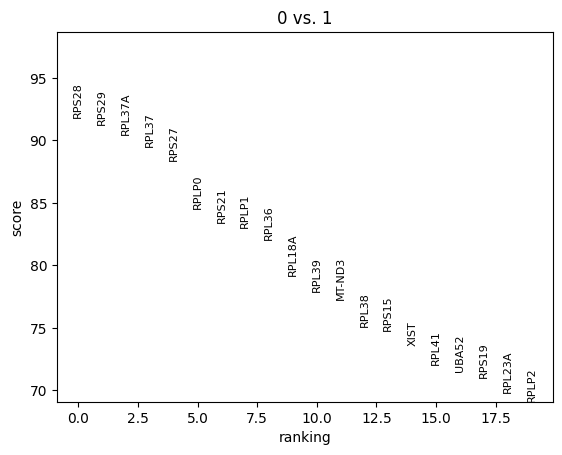

In [71]:
sc.tl.rank_genes_groups(adata_result, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_result, groups=['0'], n_genes=20)
#key error 'base' came up the first time this was run 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


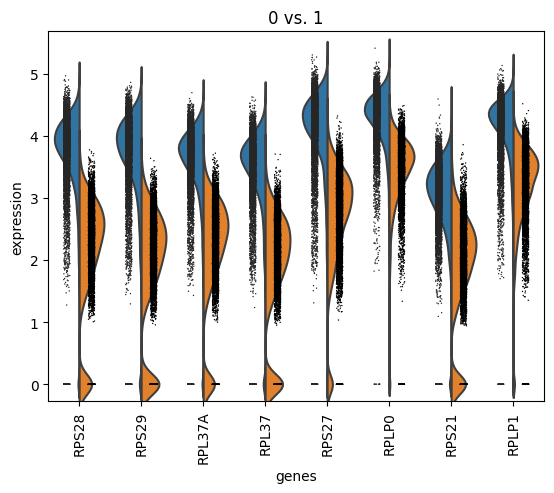

In [72]:
sc.pl.rank_genes_groups_violin(adata_result, groups='0', n_genes=8)


In [73]:
adata = sc.read(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


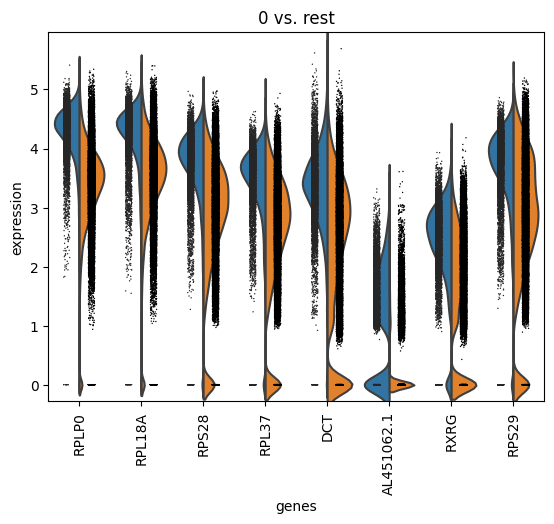

In [74]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)


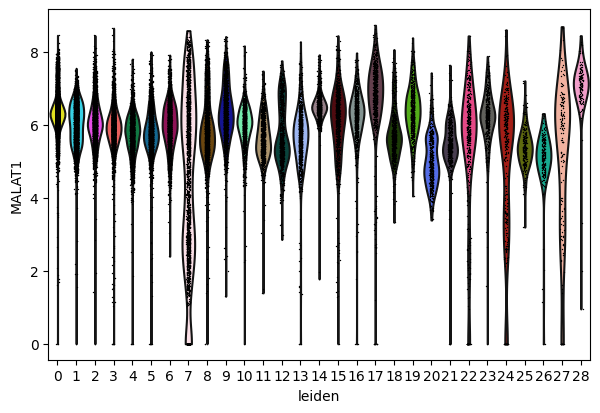

In [75]:
sc.pl.violin(adata, ['MALAT1'], groupby='leiden')
#command on scanpy tute: sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')
#not sure what to put for the comparison gene 

In [ ]:
#again, currently working on identifying key cell types from research, 
#do i just cluster according to healthy markers?
#new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
#adata.rename_categories('leiden', new_cluster_names)

In [78]:
#sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')


In [ ]:
#sc.pl.dotplot(adata, marker_genes, groupby='leiden');


In [ ]:
#sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);


In [ ]:
#adata
#adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading


In [ ]:
#adata.raw.to_adata().write('./write/rb_withoutX.h5ad')
